In [58]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['data.csv']


In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [98]:
df=pd.read_csv("../input/data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [99]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [100]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [101]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


Drop those columns with are empty and are of no use.

In [102]:
df.drop(['id','Unnamed: 32','diagnosis'],1,inplace=True)


**Split the data into train and test**

In [103]:
train,test=train_test_split(df,test_size=0.3)

In [104]:
X_train=train.drop('perimeter_mean',axis=1)
y_train=train['perimeter_mean']

In [105]:
X_test=test.drop('perimeter_mean',axis=1)
y_test=test['perimeter_mean']

**Using pairplot to visualise relashionship between multiple columns**

<Figure size 432x288 with 0 Axes>

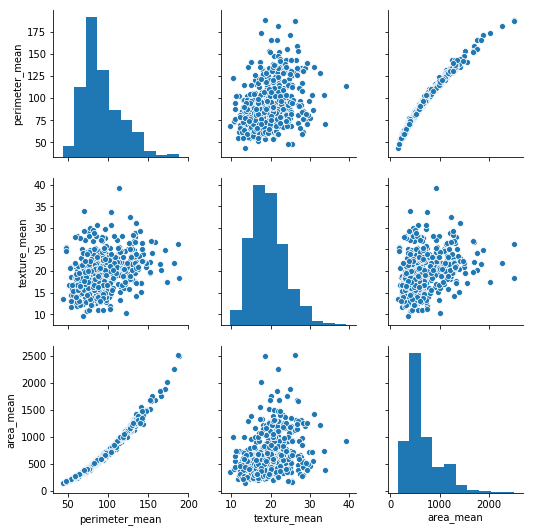

(None,)

In [68]:
import seaborn as sns
plt.figure()
sns.pairplot(df[["perimeter_mean","texture_mean","area_mean"]])
plt.show(),

***Calculating r-mean squared error for test set***

In [81]:
rmse=[]
k_list=list(range(30))
for k in k_list:
    k=k+1
    model=KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)  
    pred=model.predict(X_test)
    test_error = sqrt(mean_squared_error(y_test,pred))
    rmse.append(test_error) 
    print('TRAIN_RMSE value for k= ' , k , 'is:', test_error)

TRAIN_RMSE value for k=  1 is: 5.827707312024162
TRAIN_RMSE value for k=  2 is: 5.502862851407755
TRAIN_RMSE value for k=  3 is: 5.147917354272478
TRAIN_RMSE value for k=  4 is: 5.190368603740013
TRAIN_RMSE value for k=  5 is: 5.095296999073941
TRAIN_RMSE value for k=  6 is: 4.752256187606532
TRAIN_RMSE value for k=  7 is: 4.7078376081279725
TRAIN_RMSE value for k=  8 is: 4.844212882051885
TRAIN_RMSE value for k=  9 is: 4.982950818469728
TRAIN_RMSE value for k=  10 is: 5.26044559404935
TRAIN_RMSE value for k=  11 is: 5.473033666166791
TRAIN_RMSE value for k=  12 is: 5.5854092606539885
TRAIN_RMSE value for k=  13 is: 5.540858421658128
TRAIN_RMSE value for k=  14 is: 5.671099641088789
TRAIN_RMSE value for k=  15 is: 5.683397591629094
TRAIN_RMSE value for k=  16 is: 5.773624573952048
TRAIN_RMSE value for k=  17 is: 5.9294282617057155
TRAIN_RMSE value for k=  18 is: 6.065727995920744
TRAIN_RMSE value for k=  19 is: 6.13330348131011
TRAIN_RMSE value for k=  20 is: 6.200829708324314
TRAIN_RM

***Calculating r-mean squared error for train set***

In [74]:
rmse_val1=[]
k_list=list(range(30))
for k in k_list:
    k=k+1
    model=KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)  
    n_pred=model.predict(X_train)
    train_error = sqrt(mean_squared_error(y_train,n_pred))
    rmse_val1.append(train_error) 
    print('TRAIN_RMSE value for k= ' , k , 'is:', train_error)

TRAIN_RMSE value for k=  1 is: 0.0
TRAIN_RMSE value for k=  2 is: 1.612216065142485
TRAIN_RMSE value for k=  3 is: 2.067557569901651
TRAIN_RMSE value for k=  4 is: 2.462843444661998
TRAIN_RMSE value for k=  5 is: 2.6321838211534003
TRAIN_RMSE value for k=  6 is: 2.8809760832659905
TRAIN_RMSE value for k=  7 is: 2.961424995902872
TRAIN_RMSE value for k=  8 is: 3.077217527827346
TRAIN_RMSE value for k=  9 is: 3.1921006005738417
TRAIN_RMSE value for k=  10 is: 3.3027940927486648
TRAIN_RMSE value for k=  11 is: 3.382706028119711
TRAIN_RMSE value for k=  12 is: 3.4180060416068074
TRAIN_RMSE value for k=  13 is: 3.540767922400579
TRAIN_RMSE value for k=  14 is: 3.5920090644106577
TRAIN_RMSE value for k=  15 is: 3.6244776702180888
TRAIN_RMSE value for k=  16 is: 3.751831664790329
TRAIN_RMSE value for k=  17 is: 3.795379705520225
TRAIN_RMSE value for k=  18 is: 3.8627191841934967
TRAIN_RMSE value for k=  19 is: 3.899360244644698
TRAIN_RMSE value for k=  20 is: 3.9544940876579413
TRAIN_RMSE val

**Plot Test error vs K**

Text(0, 0.5, 'Test error')

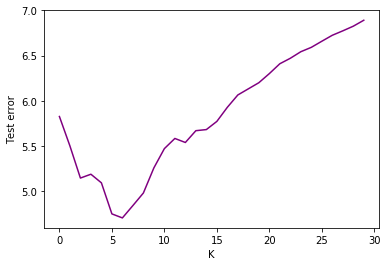

In [76]:
plt.plot(k_list,rmse,color="purple")
plt.xlabel('K')
plt.ylabel('Test error')

**Plot Train error vs K **

Text(0, 0.5, 'Train error')

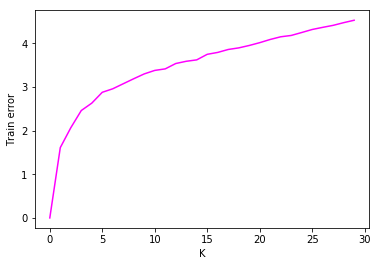

In [78]:
plt.plot(k_list,rmse_val1,color="magenta")
plt.xlabel('K')
plt.ylabel('Train error')

In [86]:
k_list=list(range(30))
newlist=list()
for k in k_list:
    y=k+1
    newlist.append(1/y)
    

**Plot training error and test error vs 1/k**

Text(0, 0.5, 'error')

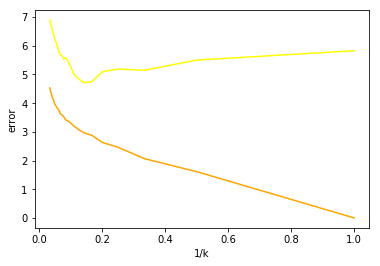

In [88]:
plt.plot(newlist,rmse,color="yellow")
plt.plot(newlist,rmse_val1,color="orange")
plt.xlabel('1/k')
plt.ylabel('error')

***Implementing own created knn function***

In [136]:
def train1(X_train,y_train):
    return

In [137]:
def predict(X_train,y_train,x_test,k):
    distances=[]
    targets=[]
    
    for i in range(len(X_train)):
        distance=np.sqrt(np.sum(np.square(x_test-X_train)))
        distances.append([distance,y_train])
    distances=sorted(distances)
    
    x=0
    for i in range(k):
        x=x+distances[i][1]
    return(x/k)    

In [138]:
def kNearestNeighbor(X_train,y_train,X_test,predictions,k):
    if k>len(X_train):
        raise ValueError
    train1(X_train,y_train)
    
    for i in range(len(X_test)):
        print(X_test.iloc[i, :])
        print(predict(X_train,y_train,X_test.iloc[i, :],k))


In [139]:
predictions=[]
try:
    kNearestNeighbor(X_train,y_train,X_test,predictions,50)
    
except ValueError:
    print("ERROR!")

radius_mean                 10.600000
texture_mean                18.950000
area_mean                  346.400000
smoothness_mean              0.096880
compactness_mean             0.114700
concavity_mean               0.063870
concave points_mean          0.026420
symmetry_mean                0.192200
fractal_dimension_mean       0.064910
radius_se                    0.450500
texture_se                   1.197000
perimeter_se                 3.430000
area_se                     27.100000
smoothness_se                0.007470
compactness_se               0.035810
concavity_se                 0.033540
concave points_se            0.013650
symmetry_se                  0.035040
fractal_dimension_se         0.003318
radius_worst                11.880000
texture_worst               22.940000
perimeter_worst             78.280000
area_worst                 424.800000
smoothness_worst             0.121300
compactness_worst            0.251500
concavity_worst              0.191600
concave poin